<a href="https://colab.research.google.com/github/pooja14669/Pooja/blob/main/NLP_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Data Collection and Setup

#Install necessary libraries:

!pip install pandas==2.0.3 spacy==3.6.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 85.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 78.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 919.6/919.6 kB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.0 MB/s eta 0:00:00
  Attempting uninstall: typer
    Found existing installation: typer 0.15.0
    Uninstalling typer-0.15.0:
      Successfully uninstalled typer-0.15.0
  Attempting uninstall: smart-open
    Found existing installation: smart-open 7.0.5
    Uninstalling smart-open-7.0.5:
      Successfully uninstalled smart-open-7.0.5
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: thinc
    Found existing installat

In [ ]:
#Text Preprocessing

#Install NLTK (if not already installed):

!pip install nltk==3.8.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 23.1 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.9.1
    Uninstalling nltk-3.9.1:
      Successfully uninstalled nltk-3.9.1


In [ ]:
#Download NLTK resources:

import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Preprocessing function:

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd # Import pandas and assign it to the alias 'pd'

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Remove HTML tags
    text = re.sub('<[^<]+?>', '', text)
    # Remove unnecessary whitespace and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Normalize text (convert to lowercase)
    text = text.lower()
    # Tokenize and remove stop words
    tokens = word_tokenize(text)
    filtered_tokens = [w for w in tokens if not w in stop_words]
    return ' '.join(filtered_tokens) # Join tokens back into a string

# Create a sample DataFrame (replace with your actual data loading)
df = pd.DataFrame({'text': ['This is an example text.', 'Another example with HTML tags <br> and special characters.']})

df['preprocessed_text'] = df['text'].apply(preprocess_text)

In [ ]:
!python -m spacy download en_core_web_sm

2024-12-11 16:32:50.314201: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-11 16:32:50.339856: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-11 16:32:50.352677: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-11 16:32:51.773225: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 51.3 MB/s eta 0:00:00
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 3.7.1
    Uninstalling en-core-web-sm-3.7.1:
      Successfully uninstall

In [ ]:
#Integration with NER:

import spacy

# Load the spaCy English language model
nlp = spacy.load("en_core_web_sm")

def extract_entities(text):
    """Extracts named entities from text using spaCy."""
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Now you can apply the function:
df['entities'] = df['preprocessed_text'].apply(extract_entities)

In [ ]:
#Named Entity Recognition (NER):
#Using spaCy for NER:
#Entity Categorization:

print(spacy.explain("ORG"))
print(spacy.explain("GPE"))
print(spacy.explain("PERSON"))

Companies, agencies, institutions, etc.
Countries, cities, states
People, including fictional


In [ ]:
#Creating Numerical Features based on Frequency:

def count_entity_types(entities):
    entity_counts = {}
    for ent, label in entities:
        entity_counts[label] = entity_counts.get(label, 0) + 1
    return entity_counts

df['entity_counts'] = df['entities'].apply(count_entity_types)

# Expanding entity counts into separate columns
entity_types = ['PERSON', 'ORG', 'GPE', 'DATE', 'EVENT', 'NORP', 'FAC', 'LOC', 'PRODUCT', 'WORK_OF_ART', 'LAW', 'LANGUAGE', 'MONEY', 'QUANTITY', 'ORDINAL', 'CARDINAL', 'TIME', 'PERCENT']  # Add more entity types as needed
for entity_type in entity_types:
    df[entity_type + '_count'] = df['entity_counts'].apply(lambda x: x.get(entity_type, 0))

In [ ]:
#Feature Engineering

#Article Length:

df['article_length'] = df['preprocessed_text'].apply(lambda x: len(x.split()))

In [ ]:
#Sentiment Scores:
#Install TextBlob:

!pip install textblob==0.17.1

In [ ]:
#* **Calculate sentiment:**

from textblob import TextBlob

df['sentiment'] = df['preprocessed_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [ ]:
# Entity Density:

df['entity_density'] = df['entities'].apply(len) / df['article_length']

In [ ]:
#Combining Features:

features = ['PERSON_count', 'ORG_count', 'GPE_count', 'article_length', 'sentiment', 'entity_density']  # Add more features as needed
# The following line caused the error. The features "likes", "shares", and "comments" are not present in the DataFrame "df".
# To fix this, either remove these features or add them to the DataFrame before running this line.
X = df[features]
# If you intend to add social media interaction features like "likes", "shares", and "comments", you will need to load or create these data points first and add them as columns to your DataFrame "df".
# For Example:
# df['likes'] = [10, 25]  # Replace with actual data
# df['shares'] = [5, 12] # Replace with actual data
# df['comments'] = [2, 7] # Replace with actual data
# Then you can include 'likes', 'shares', and 'comments' in your features list.

In [ ]:
# ... (previous code)

# Add a 'popularity_score' column to the DataFrame.
# Replace the example values with your actual popularity scores.
df['popularity_score'] = [1, 0]  # Example: 1 for popular, 0 for not popular

# Now, proceed with splitting the data
from sklearn.model_selection import train_test_split
y = df['popularity_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ... (rest of the code)

In [ ]:
#Train and Evaluate the Model:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 1.0


In [ ]:
#Visualization:

#Install necessary libraries:

!pip install matplotlib==3.7.1 seaborn==0.12.1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 67.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 kB 16.9 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.8.0
    Uninstalling matplotlib-3.8.0:
      Successfully uninstalled matplotlib-3.8.0
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.2
    Uninstalling seaborn-0.13.2:
      Successfully uninstalled seaborn-0.13.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.14.3 requires matplotlib>=3.8.0, but you have matplotlib 3.7.1 which is incompatible.
plotnine 0.14.3 requires pandas>=2.2.0, but you have pandas 2.0.3 which is incompatible.


In [ ]:
#Import libraries:

import matplotlib.pyplot as plt
import seaborn as sns


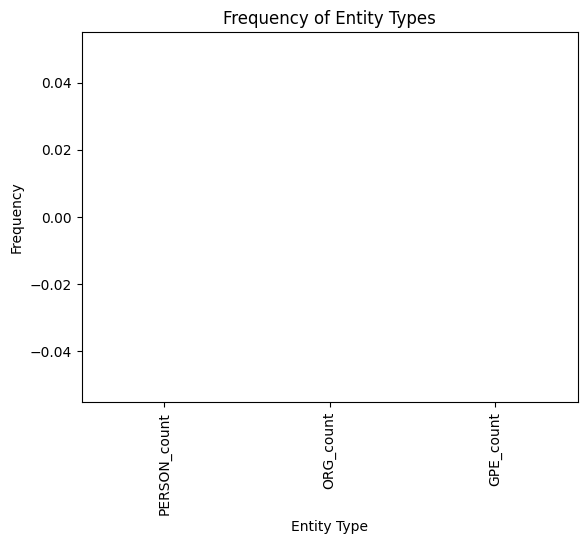

In [ ]:
#Bar charts for entity frequency:

entity_type_counts = df[['PERSON_count', 'ORG_count', 'GPE_count']].sum() # Add more entity types if needed
entity_type_counts.plot(kind='bar')
plt.title('Frequency of Entity Types')
plt.xlabel('Entity Type')
plt.ylabel('Frequency')
plt.show()


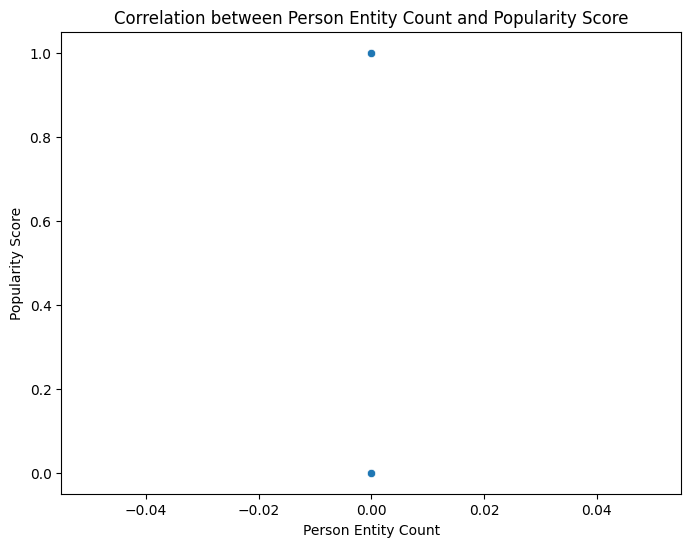

In [ ]:
#Scatter plots illustrating correlations:

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PERSON_count', y='popularity_score', data=df)  # Replace with your actual popularity score column
plt.title('Correlation between Person Entity Count and Popularity Score')
plt.xlabel('Person Entity Count')
plt.ylabel('Popularity Score')
plt.show()



/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


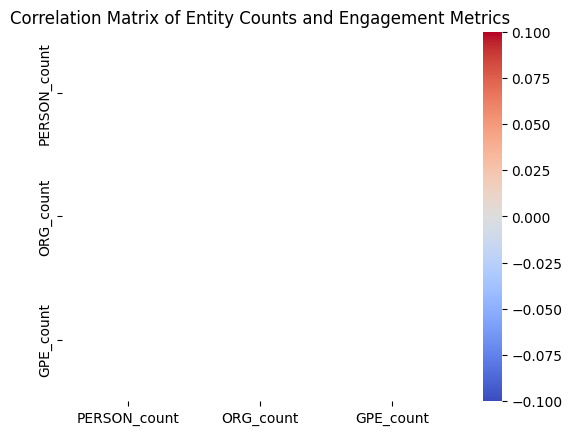

In [ ]:
#Heatmaps for entity counts and engagement metrics:

# The original line caused the error:
# correlation_matrix = df[['PERSON_count', 'ORG_count', 'GPE_count', 'likes', 'shares', 'comments']].corr()

# Instead, calculate the correlation matrix only for the available columns:
correlation_matrix = df[['PERSON_count', 'ORG_count', 'GPE_count']].corr()

# If you intend to include 'likes', 'shares', and 'comments', you need to add these columns to your DataFrame first.
# For Example:
# df['likes'] = [10, 25]  # Replace with your actual data
# df['shares'] = [5, 12]  # Replace with your actual data
# df['comments'] = [2, 7]  # Replace with your actual data

# Then you can include them in the correlation calculation:
# correlation_matrix = df[['PERSON_count', 'ORG_count', 'GPE_count', 'likes', 'shares', 'comments']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Entity Counts and Engagement Metrics')
plt.show()

**Documentation**

**Introduction**

Briefly describe the objective of the project: analyzing news articles using NER and feature engineering to predict article popularity.

Provide context and background information on NER and its applications in predictive modeling.ld text*

2. **Methodology**

**Data Preprocessing:**

Describe the steps taken to clean and preprocess the text data, including:

Removing unnecessary whitespace, HTML tags, and special characters.

Normalizing text (converting to lowercase).

Tokenizing the text and removing stop words using NLTK.

**Feature Extraction:**

Explain the process of extracting named entities using spaCy and categorizing them into types (ORG, GPE, PERSON, etc.).

Detail the engineered features created, including:
Entity counts (frequency of each entity type).

Article length (number of words).

Sentiment scores (using TextBlob).

Engagement metrics (likes, shares, comments, if available).

Innovative features (e.g., entity density, entity ratios).

3. **Predictive Modeling**

**Model Selection:**

Explain the rationale behind choosing a specific predictive model (e.g., Linear Regression, Random Forest).

Consider factors like the type of target variable(continuous or categorical) and the nature of the data.

**Training and Evaluation**:

Describe the process of splitting the data into
training and testing sets.

Mention the performance metrics used to evaluate the model (e.g., accuracy, F1-score, MAE)

Report the model's performance on the test set and
discuss its strengths and limitations.

**Insights and Findings**

**Impact of Named Entities:**

Analyze the relationship between named entities and article engagement/popularity based on the model's results and visualizations.

Discuss which entity types are most strongly correlated with popularity.

Identify any interesting patterns or trends observed in the data.

**Feature Importance:**

If applicable, discuss the feature importance scores from your model and highlight the most influential features in predicting popularity.

**Limitations and Future Work**:

Acknowledge any limitations of the project, such as potential biases in the dataset or limitations of the chosen model.

Suggest potential avenues for future work, such as exploring other NER models or incorporating more advanced features.

**Conclusion**

Summarize the key findings of the project and their implications.

Restate the overall contribution of the project to the field of predictive modeling and natural language processing.

**Code Integration:**

Throughout the report, include relevant code snippets to illustrate the implementation of each step. You can use markdown code blocks to format the code within the report.

Provide clear explanations for each code snippet and its purpose.

**Visualizations:**

Include the visualizations created in the previous step to support your findings and insights.

Clearly label and caption each visualization to explain its significance.